In [2]:
import os
import json
import tempfile
import requests
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

import matplotlib.pyplot as plt

In [4]:
#load model
model = tf.keras.models.load_model('./saved_model/1')

In [5]:
MODEL_DIR='saved_model'
version = "1"
export_path = os.path.join(MODEL_DIR, str(version))

In [6]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 225, 225, 3)
        name: serving_default_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_9'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 4)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Concrete Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          input_1: TensorS

In [7]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [9]:
test_images = load_img("./test/gunting.jpg", target_size=(225, 225))

x = img_to_array(test_images)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

data = json.dumps({"signature_name": "serving_default", "instances": images.tolist()})

Prediction : kaleng



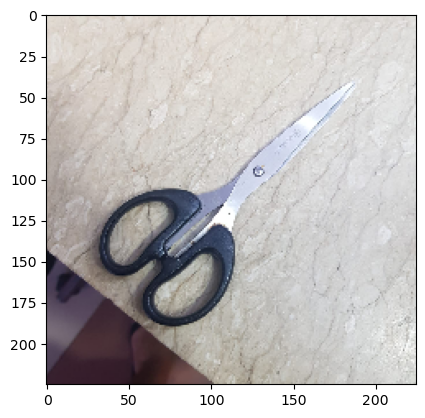

In [10]:
class_names = ["kaleng","kertas","minyak","organik"]

headers = {"content-type": "application/json"}
json_response = requests.post('http://127.0.0.1:8501/v1/models/dauruang:predict', data=data, headers=headers)

predictions = json.loads(json_response.text)['predictions']

plt.imshow(test_images)

print("Prediction : " + class_names[np.argmax(predictions)] + "\n")